### 목표 : 무게에 따른 길이를 예측해주는 모델
- 데이터 : fish.csv
- 피처 : 무게
- 타겟 : 길이

In [4]:
# (1) 모듈 로딩 및 데이터 준비
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np

In [5]:
# 데이터 파일
file = '../data/fish.csv'

In [7]:
fishDF = pd.read_csv(file, usecols=[0, 1,2]) # 특정 품종의 무게와 길이를 비교하려고 하기 때문에 Species 컬럼까지 같이 가지고 온다.
fishDF

Species  Weight  Length
0     Bream   242.0    25.4
1     Bream   290.0    26.3
2     Bream   340.0    26.5
3     Bream   363.0    29.0
4     Bream   430.0    29.0
..      ...     ...     ...
154   Smelt    12.2    12.2
155   Smelt    13.4    12.4
156   Smelt    12.2    13.0
157   Smelt    19.7    14.3
158   Smelt    19.9    15.0

[159 rows x 3 columns]

In [15]:
# 학습에 사용할 데이터 추출 => Perch 행만 추출
mask = fishDF['Species'] =='Perch'
perchDF= fishDF[mask]
#인덱스 정렬
perchDF.reset_index(drop=True, inplace=True)

In [16]:
perchDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  56 non-null     object 
 1   Weight   56 non-null     float64
 2   Length   56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


In [17]:
perchDF.head(3)

Species  Weight  Length
0   Perch     5.9     8.4
1   Perch    32.0    13.7
2   Perch    40.0    15.0

In [19]:
# 수치 컬럼의 데이터 정보 확인
perchDF.describe()

Weight     Length
count    56.000000  56.000000
mean    382.239286  27.892857
std     347.617717   9.021668
min       5.900000   8.400000
25%     120.000000  21.825000
50%     207.500000  25.300000
75%     692.500000  36.625000
max    1100.000000  44.000000

(3) 데이터 전처리 <hr>
- 결측치, 이상치, 중복값 처리
- 데이터 분포, 컬럼 분포, 최빈값, 고유값

(3-1) 데이터 분포

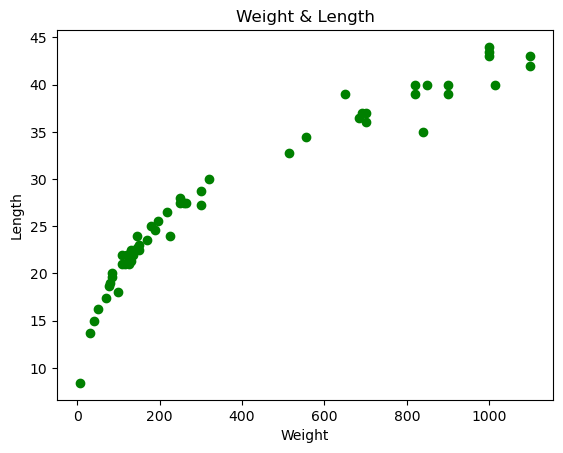

In [25]:
# 무게와 길이에 대한 시각화
plt.plot(perchDF['Weight'], perchDF['Length'], 'go')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.title('Weight & Length')
plt.show()

In [26]:
# 무게와 길이에 대한 상관계수
perchDF.corr(numeric_only=True) # => 비례관계에 있다.

Weight    Length
Weight  1.000000  0.958656
Length  0.958656  1.000000

In [28]:
# [분석 결과] 무게에 따른 길이는 비례관계
# 무게 + 연산 ===> 길이
perchDF.iloc[:3]

Species  Weight  Length
0   Perch     5.9     8.4
1   Perch    32.0    13.7
2   Perch    40.0    15.0

In [30]:
model = (perchDF['Weight']*1/5)+7

In [33]:
(perchDF['Length']-model).abs().sum()

3112.12

In [36]:
model = (perchDF['Weight']*1/5)+7.5
model[:3]

0     8.68
1    13.90
2    15.50
Name: Weight, dtype: float64

(4) 학습 진행 <hr>
- 학습 방법 : 지도학습 + 회귀(예측) => 선형회귀 LinearRegression

In [38]:
# 모델 인스턴스 생성
model = LinearRegression()

In [40]:
model.fit(perchDF[['Weight']], perchDF['Length']) #컬럼 1개를 뽑더라도 [[컬럼]]으로 가져오면 2차원 데이터(데이터프레임)으로 가져올 수 있다.

LinearRegression()

In [42]:
# 학습 후 속성 확인
print(f'피처에 할당되는 가중치 계수 : {model.coef_}') # 가중치 : 직선에서의 기울기
print(f'수식에 사용되는 절편 계수 : {model.intercept_}') # 절편 : 회귀선(종속 변수와 독립 변수들 간의 관계를 나타내는 직선이나 곡선)이 종속 변수와 독립 변수가 모두 0일 때(즉, 원점)의 값

피처에 할당되는 가중치 계수 : [0.02487985]
수식에 사용되는 절편 계수 : 18.382802913636723


In [44]:
(perchDF['Weight']*model.coef_)+model.intercept_

0     18.529594
1     19.178958
2     19.377997
3     19.664115
4     20.124392
5     20.870787
6     20.323431
7     20.373191
8     20.497590
9     20.497590
10    21.119586
11    21.243985
12    21.492784
13    21.617183
14    21.368384
15    21.368384
16    21.617183
17    21.741582
18    21.119586
19    21.617183
20    22.114780
21    21.990380
22    22.114780
23    22.612377
24    23.980768
25    21.990380
26    23.060214
27    22.861175
28    23.284132
29    23.806609
30    25.846756
31    24.851563
32    24.975962
33    24.602764
34    24.602764
35    25.846756
36    26.344353
37    31.171043
38    32.215997
39    39.281873
40    35.425497
41    35.798695
42    35.798695
43    35.549896
44    40.774664
45    34.554702
46    38.784276
47    39.530671
48    40.774664
49    43.635846
50    38.784276
51    45.750633
52    43.262648
53    45.750633
54    43.262648
55    43.262648
Name: Weight, dtype: float64

(5) 테스트<hr>

- 제대로 만들어진 모델인지 확인하는 과정
    * 훈련용 데이터에 대한 점수
    * 테스트용 데이터에 대한 점수
    * 훈련점수와 테스트 점수 비교
        - 훈련 점수 > 테스트 점수 : 과대 적합(Overfiting)
        - 훈련 점수 ≒ 테스트 점수 : 최적 적합
        - 훈련점수 ▼ 테스트 점수 ▼ : 과소 적합(Underfitting).

In [53]:
# 결정계수 R2 즉, 얼마나 정답에 가깝게 결과를 예측해내는지를 나타내는 계수값
# 범위 : 0.0 ~ 1.0
# 1.0에 가까울수록 잘 만들어진 모델.
model.score(perchDF[['Weight']], perchDF['Length']) # (훈련에 사용된 데이터 말고) 테스트 데이터 사용.

0.919021073244782

◆ 과대적합 : 훈련 데이터 셋에 특화된/최적화된 모델
- -> 새로운 데이터에 대한 오차 발생률 高

◆ 과소적합 : 훈련 데이터 셋의 규칙과 패턴이 반영되지 않는 모델
- 훈련 데이터 오류가 줄어들지 않음.
- 원인 : 학습 횟수 부족, 데이터(특성)이 부족하여 모델 지나치게 단순

◆ 최적적합
- 훈련 데이터 셋의 규칙 및 패턴이 "일반화"된 모델
- 훈련 데이터셋과 새로운 데이터에 대한 오차 및 정확도가 비슷함.
- 새로운 데이터에 대한 정확도가 높음.

<hr>

- 편중되지 않은 다양성 갖춘 데이터로 학습 진행.
- 양질의 많은 데이터
- 모델 복잡도 적정수준 설정

In [55]:
y_pre = model.predict(perchDF[['Weight']]) # 예측값 계산

In [60]:
y_pre = np.round(y_pre, 1) #소수점 자리 수가 맞지 않기 때문에 np.round로 소수점 첫번째 자리로 변경.

#오차 계산 => 예측값 - 정답
errorSR = y_pre - perchDF.Length
#errorSR

In [57]:
# MSE 직접 구하는 방법
(errorSR**2).sum()/errorSR.shape[0]

6.483571428571426

In [59]:
# 정답과 완벽히 똑같은 개수 찾기 == > 이 데이터셋에서는 1개
errorSR[(y_pre - perchDF.Length)==0.0]

24    0.0
Name: Length, dtype: float64

(6) 성능평가 <hr>
- 결정계수 값 : 1.0에 가까울수록 좋음
- 오차평균 값 : 낮을수록 좋음
- 활용 모듈 : sklearn.metrics

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # 모델의 성능을 평가할 떄 사용함

In [71]:
# 결정 계수 값
r2_score(perchDF['Length'], y_pre)

0.918891577369194

In [72]:
# 평균제곱오차
mean_squared_error(perchDF['Length'], y_pre)

6.483571428571426

In [73]:
# 평균절댓값오차
mean_absolute_error(perchDF['Length'], y_pre) # y_pre=예측값.

1.8535714285714282